[View in Colaboratory](https://colab.research.google.com/github/nenorden/Transfer-learning-on-Fashion-MNIST/blob/master/PCA.ipynb)

In [1]:
import tensorflow as tf
print(tf.test.gpu_device_name())

/device:GPU:0


# Import data with Tensorflow

In [2]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

%matplotlib inline
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

import os

os.chdir('/content/fashion-mnist/')
import utils.mnist_reader as mnist_reader
os.chdir("/")

# train and test data
images_train, labels_train = mnist_reader.load_mnist('content/fashion-mnist/data/fashion', kind='train')
images_test, labels_test = mnist_reader.load_mnist('content/fashion-mnist/data/fashion', kind='t10k')

print(images_train.shape)


Cloning into 'fashion-mnist'...
remote: Counting objects: 609, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 609 (delta 3), reused 0 (delta 0), pack-reused 603
Receiving objects: 100% (609/609), 105.17 MiB | 66.39 MiB/s, done.
Resolving deltas: 100% (345/345), done.
(60000, 784)


# Import training and test features
Extracted with ResNet18.

In [4]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

train_file_id = '1u9MTHtqwDtHL3z6NHMP8xRJw_54Fag5T'
test_file_id = '1kkbjDm6hilfA4PFcxBgRGrN8gcGY6dmn'

# Load files by ID
downloaded = drive.CreateFile({'id': train_file_id})
downloaded.GetContentFile('train_fashion-MNIST_resnet.npy')

downloaded = drive.CreateFile({'id': test_file_id})
downloaded.GetContentFile('test_fashion-MNIST_resnet.npy')

# Files should be in /content/. Check!
os.chdir('/content/')
!ls
os.chdir('/')

datalab  fashion-mnist


# Have a look at the data

y = 1 (Trouser)


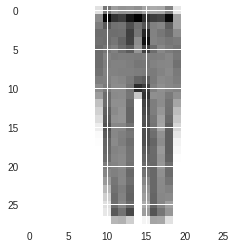

In [5]:
# Map label to clothing for convenience
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

# Map labels to colors for PCA visualization 
color_dict = {
 0: 'orange',
 1: 'gray',
 2: 'blue',
 3: 'magenta',
 4: 'cyan',
 5: 'red',
 6: 'lime',
 7: 'yellow',
 8: 'orchid',
 9: 'green'
}

# sample train image
rand_i = random.randint(0,images_train.shape[0])
sample = images_train[rand_i].reshape(28,28)
# Get label
sample_label = labels_train[rand_i]

print("y = {label_index} ({label})".format(label_index = sample_label, 
                                           label = label_dict[sample_label]))

plt.imshow(sample, cmap='Greys')
plt.show()

# PCA on original features

## Standardize the data

In [10]:
import sklearn
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

features_orig = StandardScaler().fit_transform(images_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fit PCA

In [11]:
# Fit PCA to original features
pca_orig = PCA(n_components=50) # 2D projection
pca_orig = pca_orig.fit(features_orig)
print('Variance explained by the components:', 
      pca_orig.explained_variance_ratio_)

pca_orig = pca_orig.transform(features_orig)

pca_orig_df = pd.DataFrame(data = pca_orig, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
pca_orig_df.head(10) # print 10 first data instances


Variance explained by the components: [0.22150194 0.14334186 0.05487982 0.05102631 0.04067312]


,pc1,pc2,pc3,pc4,pc5
0,-16.812930,7.211594,-2.367982,0.084275,-3.706686
1,22.272440,9.561994,9.904578,-4.127172,-5.599125
2,3.924990,-16.794870,-8.647228,-1.729655,-0.183771
3,-4.979114,-16.840440,-3.656624,2.292191,-0.617799
4,2.306663,-0.354408,5.578455,2.054605,1.306389
5,2.365551,-14.854817,-2.580306,0.333687,1.099430
6,-11.934192,-7.288529,11.423368,2.669019,0.425467
7,-3.432798,-2.787951,9.707385,0.189733,-3.533977
8,-22.128642,-7.147404,7.307483,-1.049429,1.824963
9,-19.618175,0.814189,1.732919,-6.529678,3.672646


## Plot principal components

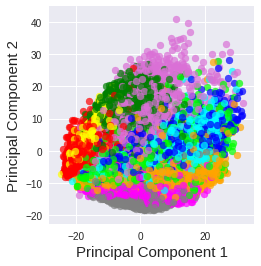

In [12]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_aspect('equal')

for i in range(len(pca_orig)):
  ax.scatter(pca_orig[i][0], pca_orig[i][1], 
             color = color_dict[labels_test[i]], alpha = 0.7)

plt.show()


# PCA on ResNet18-extracted features

## Load ResNet feature data

In [13]:
os.chdir('/content/')
resnet_train = np.load('train_fashion-MNIST_resnet.npy')
resnet_test = np.load('test_fashion-MNIST_resnet.npy')
os.chdir('/')


FileNotFoundError: ignored

## Standardize the data

In [0]:
features_resnet = StandardScaler().fit_transform(resnet_test)

## Fit PCA with 2 dimensions 

In [12]:
pca_resnet = PCA(n_components=5) # 2D projection
pca_resnet = pca_resnet.fit(features_resnet)
print('Variance explained by the two components: \n', 
      pca_resnet.explained_variance_ratio_)
pca_resnet = pca_resnet.transform(features_resnet)

pca_resnet_df = pd.DataFrame(data = pca_resnet, 
                             columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
pca_resnet_df.head(10)

Variance explained by the two components: 
 [0.02660285 0.01484317 0.01273874 0.00785515 0.00711853]


,pc1,pc2,pc3,pc4,pc5
0,7.436505,-0.312503,-3.077406,3.128776,0.168440
1,-5.491250,-2.933225,2.973943,0.890312,0.189930
2,-1.461525,5.003466,-0.274033,3.438420,1.441886
3,-0.633136,6.759027,0.814848,0.798358,-0.348894
4,-2.251145,-1.401326,-2.337646,-0.371621,2.319525
5,-2.025557,5.875876,0.149913,2.577774,0.849531
6,-1.459791,-1.445830,-0.894325,-1.669392,-0.911256
7,-1.611510,-0.334625,-1.209158,-0.699170,-1.425180
8,5.824294,1.438111,1.330643,-3.974771,2.133029
9,8.520094,-0.468890,2.689368,-3.067341,0.926218


## Plot principal components

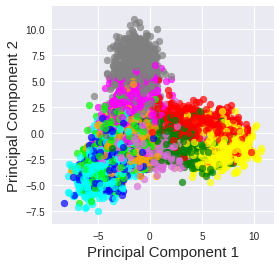

In [13]:
# Plot principal components
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_aspect('equal')
#ax.set_title('2 Component PCA on ResNet18-extracted features', fontsize = 20)

for i in range(len(pca_resnet)):
  ax.scatter(pca_resnet[i][0], pca_resnet[i][1], 
             color = color_dict[labels_test[i]], alpha = 0.7)

plt.show()